# Peer-graded Assignment: Test a Basic Linear Regression Model

Instructions
    
This week's assignment asks you to test a basic linear regression model for the association between your primary explanatory variable and a response variable, and to create a blog entry describing your results.

Data preparation for this assignment:

1) If your explanatory variable is categorical with more than two categories, you will need to collapse it down to two categories, or subset your data to select observations from 2 categories (next week you'll learn how to analyze categorical explanatory variable with more than 2 categories).

2) If your response variable is categorical, you will need to identify a quantitative variable in the data set that you can use as a response variable for this assignment. Variables with response scales with 4-5 values that represent a change in magnitude (for example, "strongly disagree to strongly agree", "never to often") can be considered quantitative for the assignment.

The assignment:

1) If you have a categorical explanatory variable, make sure one of your categories is coded "0" and generate a frequency table for this variable to check your coding. If you have a quantitative explanatory variable, center it so that the mean = 0 (or really close to 0) by subtracting the mean, and then calculate the mean to check your centering.

2) Test a linear regression model and summarize the results in a couple of sentences. Make sure to include statistical results (regression coefficients and p-values) in your summary.

WHAT TO SUBMIT: Create a blog entry where you 1) post your program and output, and 2) post a frequency table for your (recoded) categorical explanatory variable or report the mean for your centered explanatory variable. 3) Write a few sentences describing the results of your linear regression analysis.
Review criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. When relevant, gradients in the scoring will be available to reward clarity (for example, you will get one point for submitting an incomplete or inaccurate summary of results, but two points if the summary of results is complete and accurate). In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. You will be assessed equally on your description of your frequency distributions.
Example of how to write results for linear regression

The results of the linear regression model indicated that major depression (Beta=1.34, p=.0001) was significantly and positively associated with number of nicotine dependence symptoms.

Codebook: https://github.com/jeremy886/learn_datascience/blob/master/statistics/Regression%20Modeling%20in%20Practice/C3W1-linear%20regression.ipynb


## Discussion

I do two types of tests:

Test 1:
    * a response variable (X): categorical
    * a explanatory variable (y): quantitative

I want to use **top200_box** for X and **imdb_rating** (y). That is, I would like to find relationshiop between:
    * top200_box: Whether or not the movie is in the Top 200 Box Office list on BoxOfficeMojo (no, yes)
    * imdb_rating: Rating on IMDB

Test 2:

Test 1:
    * a response variable (X): quantitative - audience_score (X)
    * a explanatory variable (y): quantitative - imdb_rating (y)
    
Reminder: Do not center y variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import scipy


%matplotlib inline

/Users/apple/anaconda3/envs/deep/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
movies = pd.read_feather('../../datasets/movies.feather')

# Test 1: X categorical, y quantitative

* X: top200_box
* y: imdb_rating

In [3]:
data1 = movies[['top200_box', 'imdb_rating']].copy()

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 2 columns):
top200_box     651 non-null category
imdb_rating    651 non-null float64
dtypes: category(1), float64(1)
memory usage: 5.9 KB


In [5]:
data1.head()

,top200_box,imdb_rating
0,no,5.5
1,no,7.3
2,no,7.6
3,no,7.2
4,no,5.1


## Make one of the categories is coded "0" (top200_box)

* generate a frequency table for this variable to check your coding

In [6]:
# center imdb_rating at 0, map top200_box to 0 and 1
# why don't we also divide imdb_rating by its standard deviation (normalised it)?
data1['top200_box'] = data1['top200_box'].map({'no': 0, 'yes':1})
data1.head()

,top200_box,imdb_rating
0,0,5.5
1,0,7.3
2,0,7.6
3,0,7.2
4,0,5.1


In [8]:
data1['top200_box'].value_counts()

0    636
1     15
Name: top200_box, dtype: int64

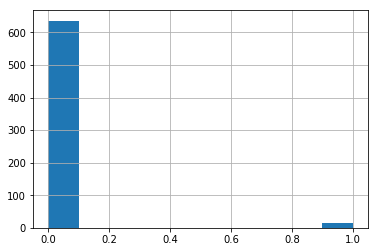

In [9]:
data1['top200_box'].hist()

## Get to know the data better

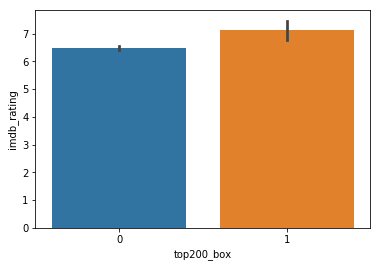

In [10]:
sns.barplot(x='top200_box', y='imdb_rating', data=data1)

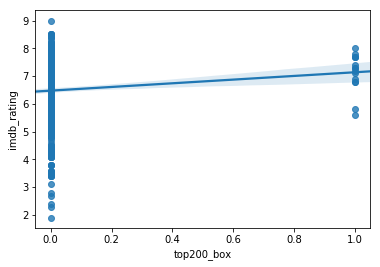

In [11]:
sns.regplot(x='top200_box', y='imdb_rating', data=data1)

# Test a linear regression model

In [19]:
model1 = smf.ols(formula='imdb_rating ~ top200_box', data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.499
Date:                Tue, 27 Mar 2018   Prob (F-statistic):             0.0193
Time:                        13:55:54   Log-Likelihood:                -973.44
No. Observations:                 651   AIC:                             1951.
Df Residuals:                     649   BIC:                             1960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4778      0.043    151.122      0.000       6.394       6.562
top200_box     0.6622      0.282      2.345      0.019       0.108       1.217
==============================================================================
Omnibus:                       86.546   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.148
Skew:                          -0.894   Prob(JB):                     3.32e-29
Kurtosis:                       4.281   Cond. No.                         6.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary of the Test 1 result

We can find the regression line: imdb_rating = 6.4778 + 0.6622 * top200_box

* We have to mean of imdb_rating back to the intercept.
* top200_box is either 0 or 1
* p-value is small enough (0.0193 < 0.05) and the regression coefficients ${\beta}1$ is positive (0.6622).



# Test 2: X quantitative, y quantitative

* X: audience_score
    audience_score: Audience score on Rotten Tomatoes
* y: imdb_rating

In [13]:
data2 = movies[['audience_score', 'imdb_rating']].copy()

## Centering the quantitative explanatory variable X (audience_score)
* center it so that the mean = 0 (or really close to 0) by subtracting the mean
* calculate the mean to check the centering

In [14]:
data2['audience_score'] = data2['audience_score'] - data2['audience_score'].mean()
data2['audience_score'].mean()

8.2951225680134586e-16

## Get to know the data better

* The scatter plot looks pretty linear.

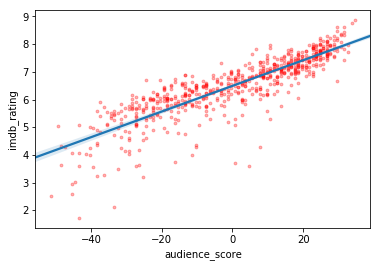

In [16]:
sns.regplot(x='audience_score', y='imdb_rating', data=data2, y_jitter=.25,
           scatter_kws={"color":"red", "alpha":0.3, "s":8})

In [20]:
model2 = smf.ols(formula='imdb_rating ~ audience_score', data=data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1926.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          2.08e-196
Time:                        13:56:01   Log-Likelihood:                -527.55
No. Observations:                 651   AIC:                             1059.
Df Residuals:                     649   BIC:                             1068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.4931      0.021    303.999      0.000       6.451       6.535
audience_score     0.0464      0.001     43.890      0.000       0.044       0.048
==============================================================================
Omnibus:                      258.445   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1234.917
Skew:                          -1.752   Prob(JB):                    6.94e-269
Kurtosis:                       8.766   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary of the Test 2 result

We can find the regression line: imdb_rating = 6.4931 + 0.0464 * audience_score (centered)

* We have to mean of imdb_rating back to the intercept.
* p-value is very small (close to zero) and the regression coefficients ${\beta}1$ is positive (0.0464).


<img src="https://openclipart.org/download/190464/1391088123.svg" width="200px"/></a>

# This is the end of the assignment.
# Below it's my notes.

* Extra: I want to test the Linear Regression Assumption


# For Test 1

## Linearity: Associations between explanatory variables and response variable are linear

Not so sure how to prove this with categorial data in X and Y because I can't draw a scatter plot to see the linearity

## Normality: Residuals are normally distributed

Probably enough

Text(0.5,1,'Residual Plot')

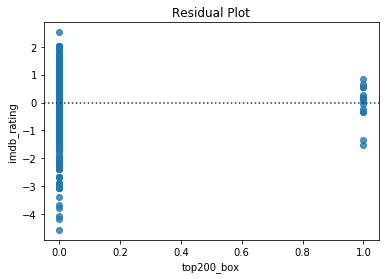

In [18]:
# residual plot: not very useful
sns.residplot(x='top200_box', y='imdb_rating', data=data1)
plt.title('Residual Plot')

Text(0.5,1,'Residual Plot')

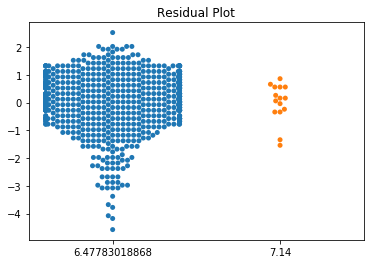

In [31]:
# a bit more clear about the distribution of residuals
sns.swarmplot(x=model1.fittedvalues, y=model1.resid)
plt.title('Residual Plot')

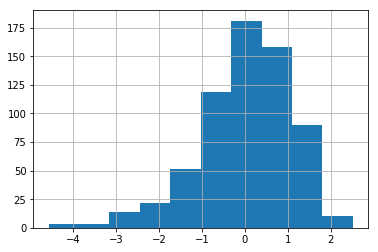

In [22]:
# use a histgram at the distribution of the residuals
model1.resid.hist(bins=10)

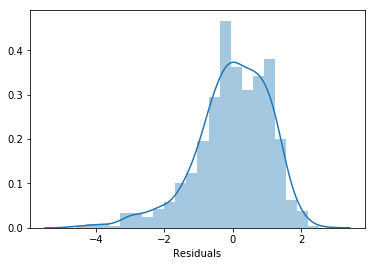

In [23]:
# use a histgram at the distribution of the residuals
# seaborn version
sns.distplot(model1.resid, axlabel='Residuals')

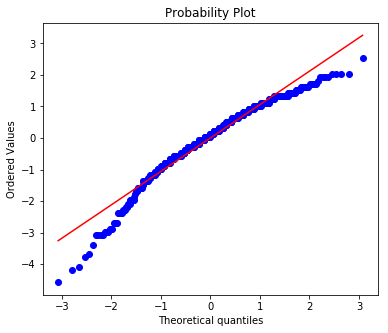

In [24]:
# qqplot
f, ax = plt.subplots(figsize=(6, 5))
scipy.stats.probplot(model1.resid, plot=ax)
plt.show()

## Homoscedasticity: The variability in the response variable is the same at all levels of the explanatory variable (X)

Sample issue as the linearity: it is difficult to check it.

## Independence: Observations are not correlated with each others.

* Be cautious about applying regression to time series data (repeated measurement of a baby) and clustered data (students in the same class).
* Difficult to fix

## Outliers: One or more observations has extreme values on variables relative to other observations

# Test 2

* Can I normalize X, instead of just centering it at 0?

## Conclusion:

* Then slope  ${\beta}1$ remains the same but the intercept ${\beta}0$ is different.


In [26]:
data3 = movies[['audience_score', 'imdb_rating']].copy()
data3['audience_zscore'] = (data3['audience_score'] - data3['audience_score'].mean()) / data3['audience_score'].std()
data3['audience_zscore'].head()

0    0.526019
1    0.921615
2    1.416111
3    0.674368
4   -1.748661
Name: audience_zscore, dtype: float64

In [29]:
data3['audience_zscore'].mean(), data3['audience_zscore'].std()

(8.1859762184343342e-17, 1.0)

In [30]:
model3 = smf.ols(formula='imdb_rating ~ audience_score', data=data3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1926.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          2.08e-196
Time:                        13:59:07   Log-Likelihood:                -527.55
No. Observations:                 651   AIC:                             1059.
Df Residuals:                     649   BIC:                             1068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6000      0.069     51.954      0.000       3.464       3.736
audience_score     0.0464      0.001     43.890      0.000       0.044       0.048
==============================================================================
Omnibus:                      258.445   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1234.917
Skew:                          -1.752   Prob(JB):                    6.94e-269
Kurtosis:                       8.766   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""